In [10]:
import os

while "polars_vector_store" not in os.listdir():
    os.chdir("..")
    print(f"Current folder: {os.getcwd()}")

In [11]:
from collections import defaultdict
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
from polars_vector_store.chroma import ChromaDB
from polars_vector_store.polars.numpy_based import NumpyBasedPolarsVectorStore
from polars_vector_store.polars.polars_argpartition import PolarsArgPartitionVectorStore
from polars_vector_store.polars.polars_top_k import PolarsTopKVectorStore

In [12]:
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("colorblind")

In [13]:
FOLDER = "benchmark_results"
DATA_FOLDER = os.path.join(FOLDER, "data")
RESULTS_FOLDER = os.path.join(FOLDER, "results")

# Embedding dimensions
EMBEDDING_DIMS = [128, 384, 768, 1024]

VECTOR_DTYPES: list[str] = ["float16", "float32"]

vectorstores_classes = [
    ChromaDB,
    NumpyBasedPolarsVectorStore,
    PolarsArgPartitionVectorStore,
    PolarsTopKVectorStore,
]


def get_filename(embedding_dim: int, vector_dtype: str) -> str:
    return f"benchmark_results_{vector_dtype}_{embedding_dim}.csv"

In [14]:
results = defaultdict(dict)

for vector_dtype in VECTOR_DTYPES:
    for embedding_dim in EMBEDDING_DIMS:
        filename = get_filename(embedding_dim, vector_dtype)
        df = pl.read_csv(os.path.join(RESULTS_FOLDER, filename))
        results[vector_dtype][embedding_dim] = df

In [15]:
# Consider only one vector dtype
vector_dtype = VECTOR_DTYPES[1]

dtype_results = results[vector_dtype]

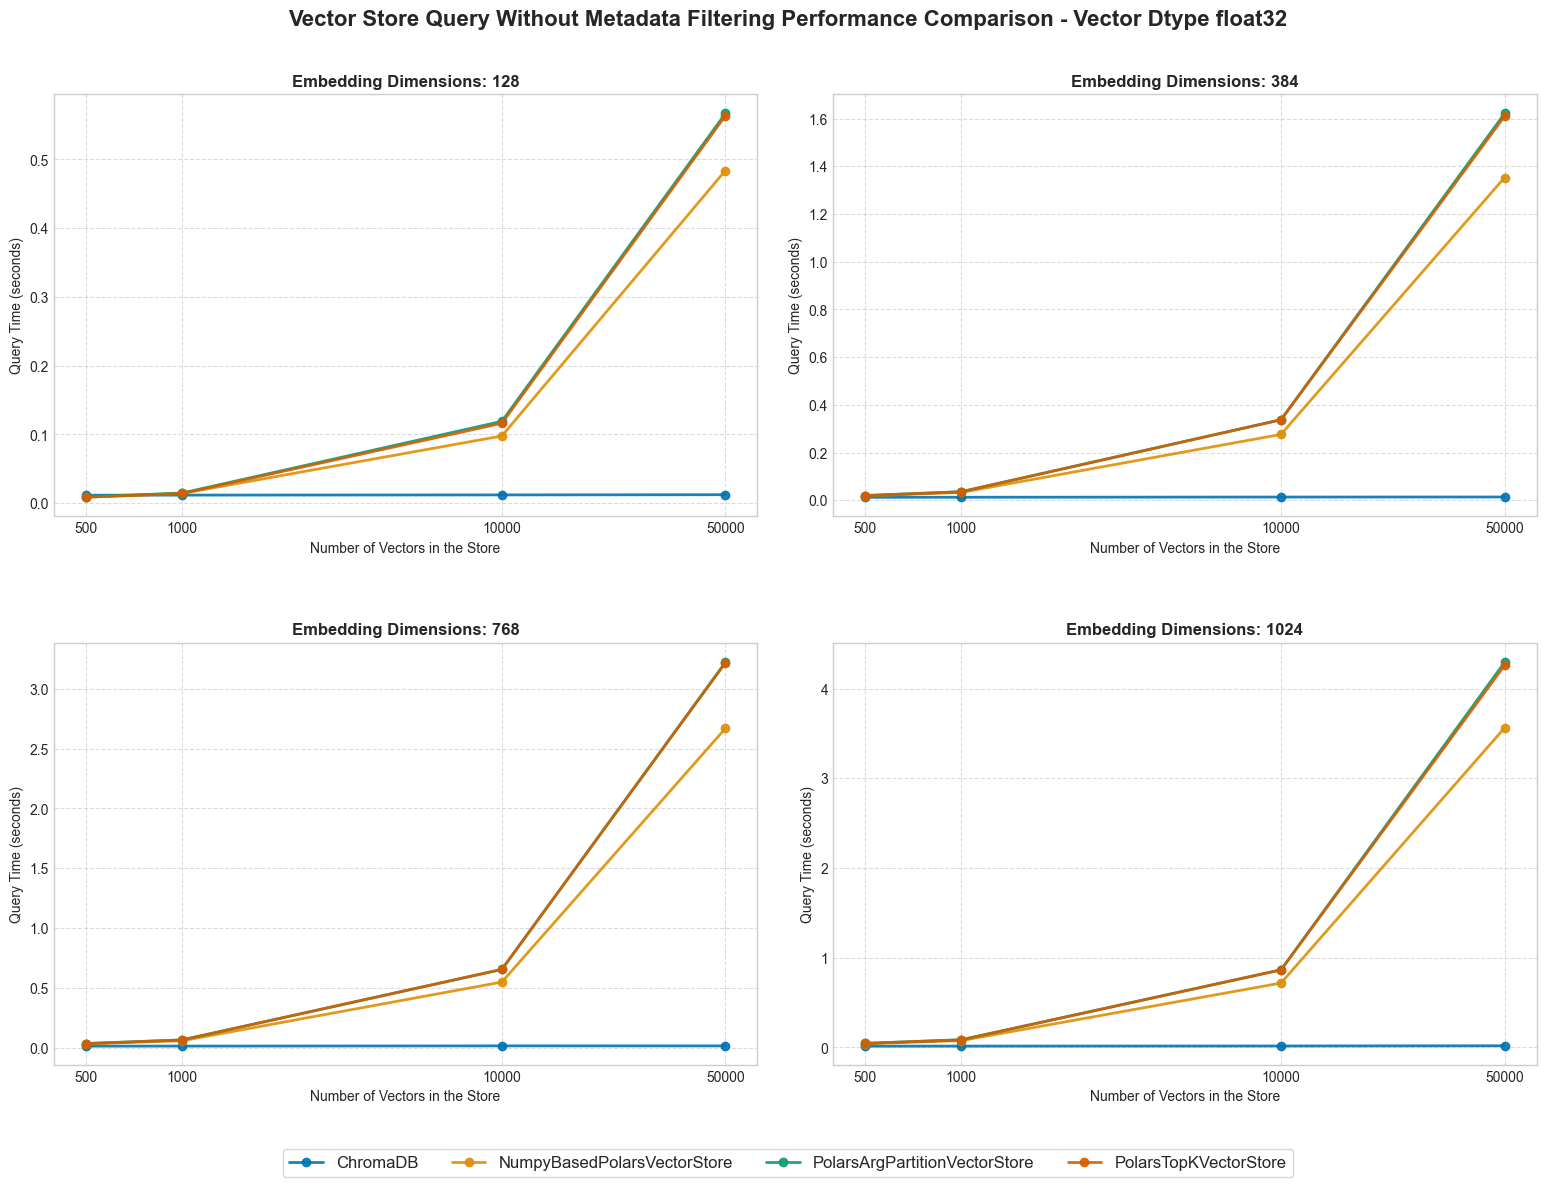

In [16]:
# Create a figure with proper size and DPI
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle(
    f"Vector Store Query Without Metadata Filtering Performance Comparison - Vector Dtype {vector_dtype}",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)


# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Store handles and labels for the legend
handles_list = []
labels_list = []

for i, embedding_dim in enumerate(EMBEDDING_DIMS):
    ax = axes[i]

    # Get data
    n_rows = dtype_results[EMBEDDING_DIMS[0]]["n_rows"].to_list()

    # Plot each vectorstore with custom formatting
    handles, labels = [], []
    for j, vectorstore_class in enumerate(vectorstores_classes):
        data = dtype_results[embedding_dim][f"{vectorstore_class.__name__} - query"]

        # Plot with markers and better line style
        (line,) = ax.plot(
            n_rows,
            data,
            label=vectorstore_class.__name__,
            marker="o",
            markersize=6,
            linewidth=2,
            alpha=0.9,
        )

        # Only collect handles and labels from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(vectorstore_class.__name__)

    if i == 0:
        handles_list = handles
        labels_list = labels

    # Improve title and labels
    ax.set_title(
        f"Embedding Dimensions: {embedding_dim}",
        fontsize=12,
        fontweight="bold",
    )
    ax.set_xlabel("Number of Vectors in the Store", fontsize=10)
    ax.set_ylabel("Query Time (seconds)", fontsize=10)
    ax.set_xscale("log")
    ax.set_xticks(n_rows)
    ax.set_xticklabels(n_rows)

    # Add grid for better readability
    ax.grid(True, linestyle="--", alpha=0.7)

# Create a single legend outside of all subplots
fig.legend(
    handles_list,
    labels_list,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.00),
    ncol=len(vectorstores_classes),
    fontsize=12,
    frameon=True,
    fancybox=True,
)


plt.subplots_adjust(bottom=0.1, hspace=0.3)

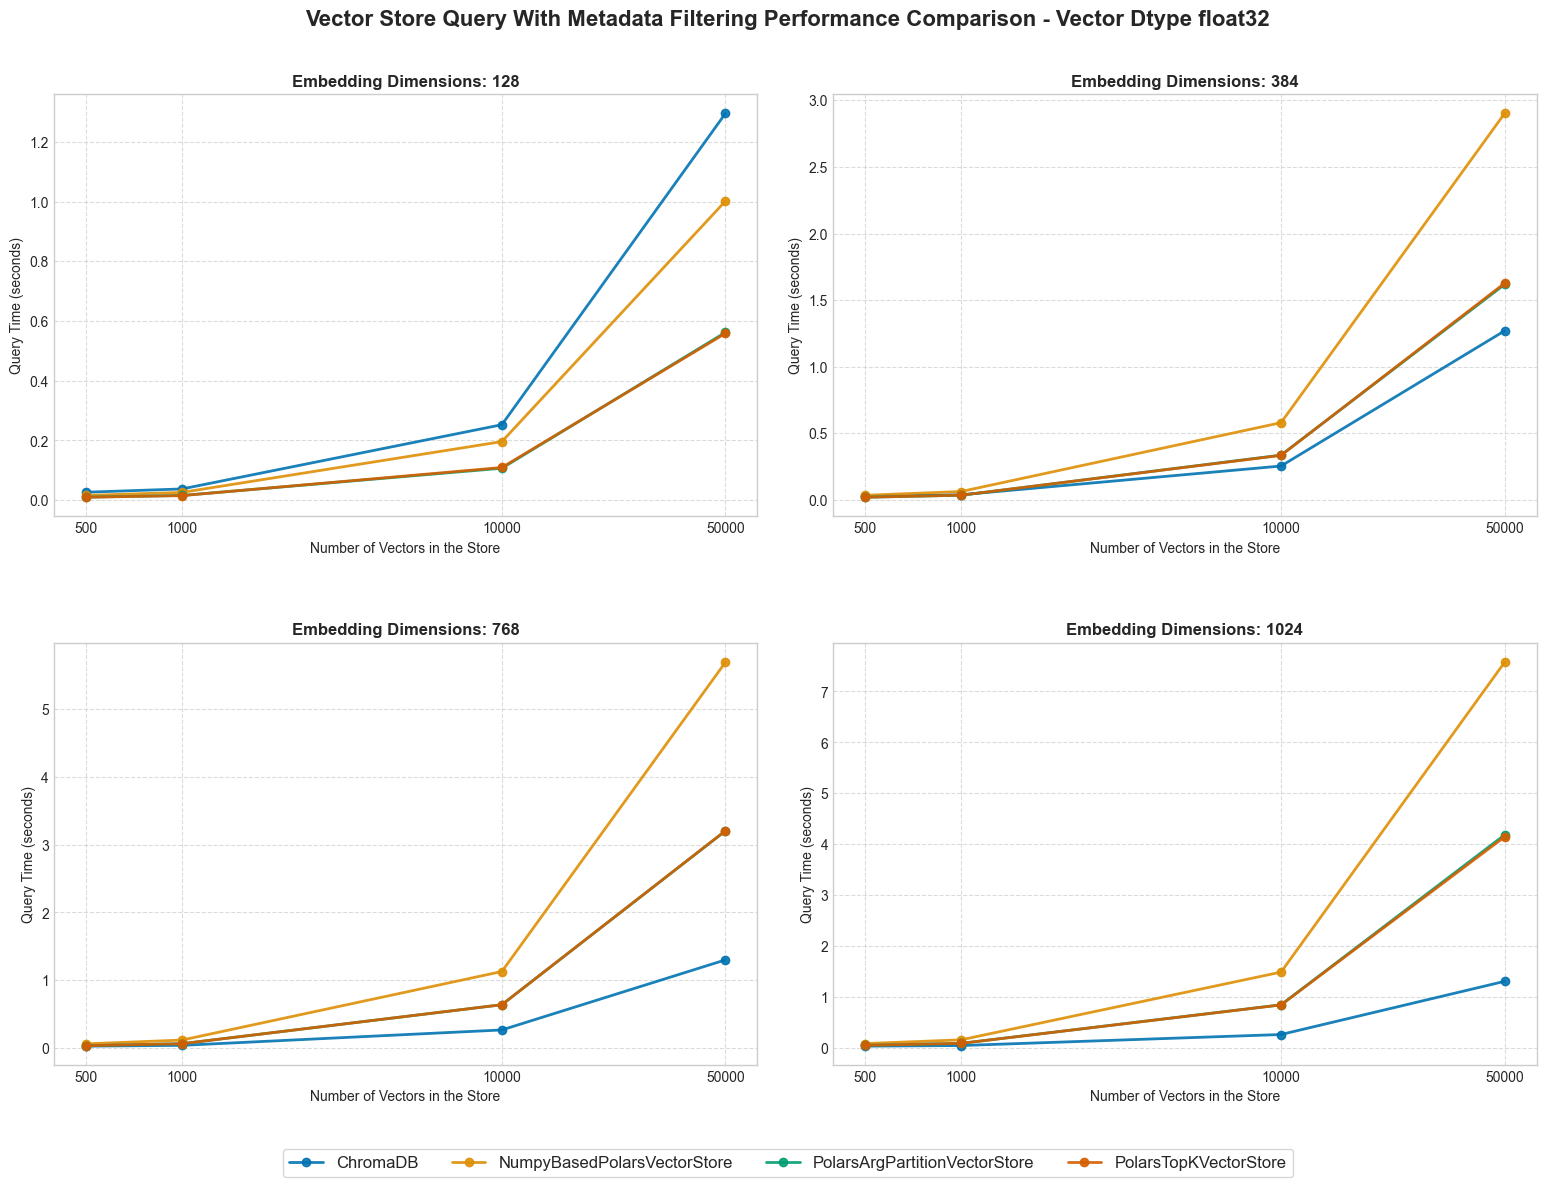

In [17]:
# Create a figure with proper size and DPI
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle(
    f"Vector Store Query With Metadata Filtering Performance Comparison - Vector Dtype {vector_dtype}",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)


# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Store handles and labels for the legend
handles_list = []
labels_list = []

for i, embedding_dim in enumerate(EMBEDDING_DIMS):
    ax = axes[i]

    # Get data
    n_rows = dtype_results[EMBEDDING_DIMS[0]]["n_rows"].to_list()

    # Plot each vectorstore with custom formatting
    handles, labels = [], []
    for j, vectorstore_class in enumerate(vectorstores_classes):
        data = dtype_results[embedding_dim][
            f"{vectorstore_class.__name__} - query 1 metadata"
        ]

        # Plot with markers and better line style
        (line,) = ax.plot(
            n_rows,
            data,
            label=vectorstore_class.__name__,
            marker="o",
            markersize=6,
            linewidth=2,
            alpha=0.9,
        )

        # Only collect handles and labels from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(vectorstore_class.__name__)

    if i == 0:
        handles_list = handles
        labels_list = labels

    # Improve title and labels
    ax.set_title(
        f"Embedding Dimensions: {embedding_dim}",
        fontsize=12,
        fontweight="bold",
    )
    ax.set_xlabel("Number of Vectors in the Store", fontsize=10)
    ax.set_ylabel("Query Time (seconds)", fontsize=10)
    ax.set_xscale("log")
    ax.set_xticks(n_rows)
    ax.set_xticklabels(n_rows)

    # Add grid for better readability
    ax.grid(True, linestyle="--", alpha=0.7)

# Create a single legend outside of all subplots
fig.legend(
    handles_list,
    labels_list,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.00),
    ncol=len(vectorstores_classes),
    fontsize=12,
    frameon=True,
    fancybox=True,
)


plt.subplots_adjust(bottom=0.1, hspace=0.3)

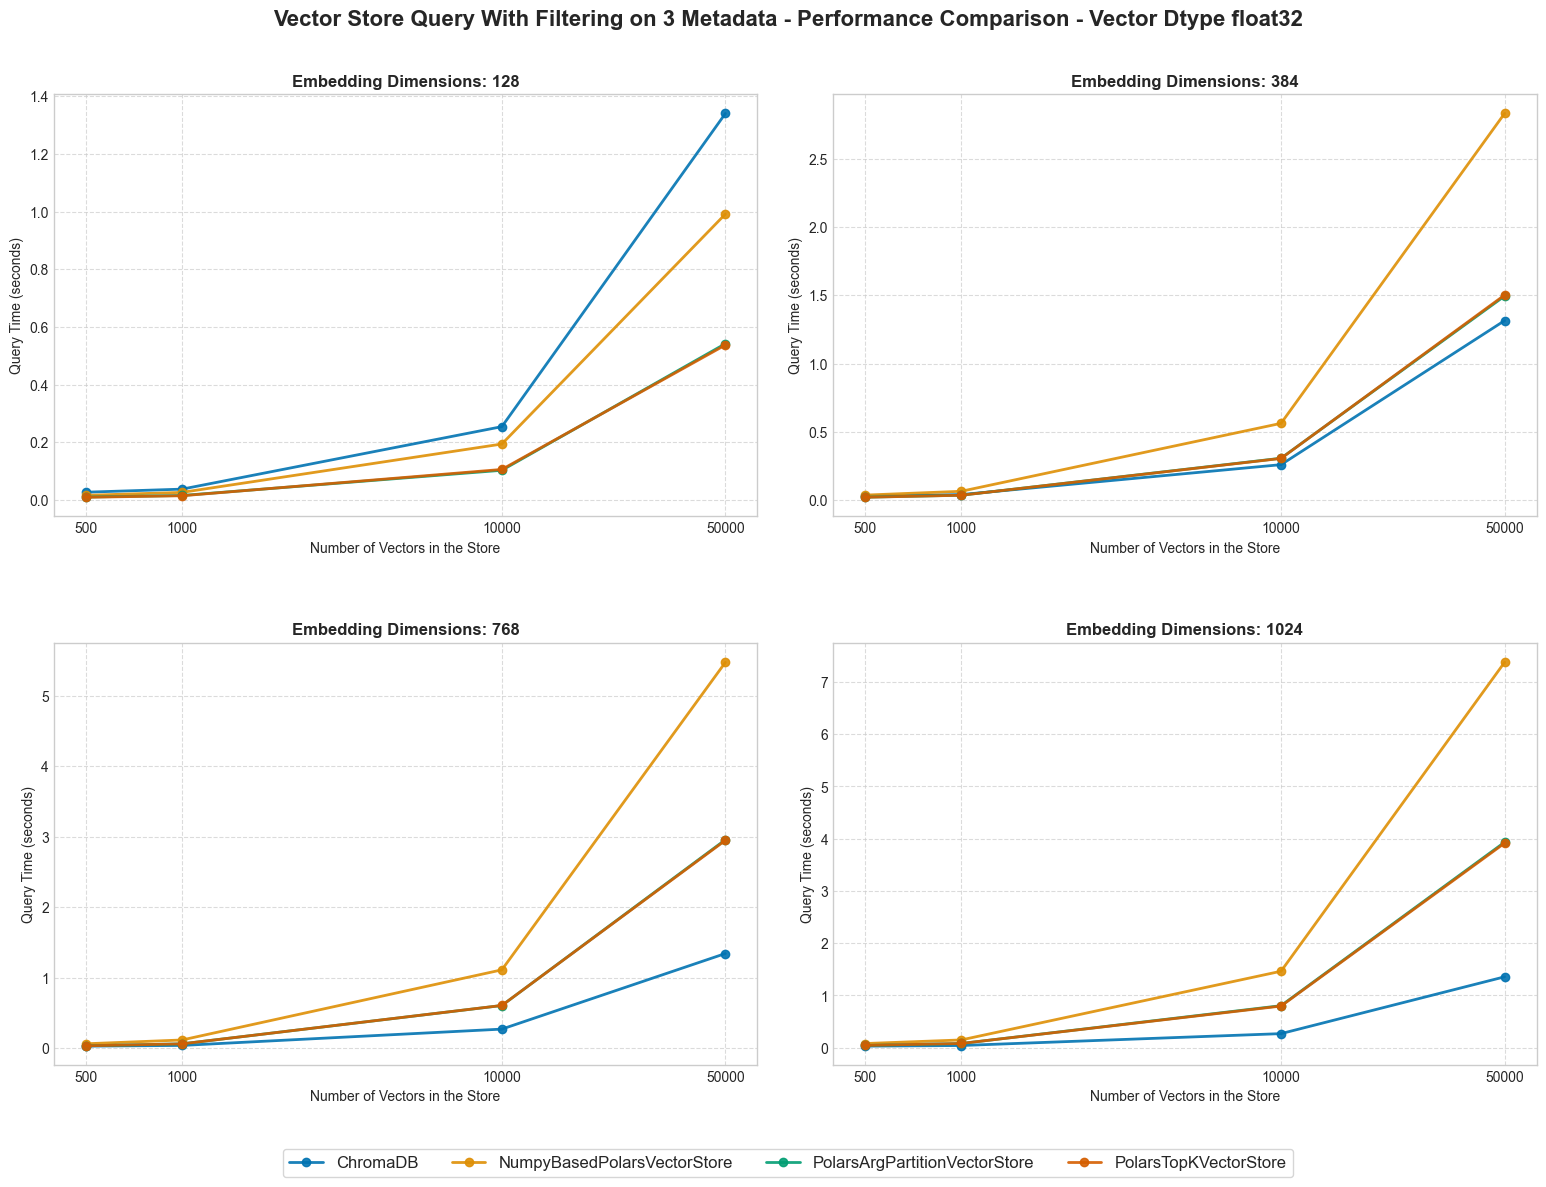

In [18]:
# Create a figure with proper size and DPI
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

fig.suptitle(
    f"Vector Store Query With Filtering on 3 Metadata - Performance Comparison - Vector Dtype {vector_dtype}",
    fontsize=16,
    fontweight="bold",
    y=0.98,
)


# Adjust spacing between subplots
plt.tight_layout(pad=3.0)

# Store handles and labels for the legend
handles_list = []
labels_list = []

for i, embedding_dim in enumerate(EMBEDDING_DIMS):
    ax = axes[i]

    # Get data
    n_rows = dtype_results[EMBEDDING_DIMS[0]]["n_rows"].to_list()

    # Plot each vectorstore with custom formatting
    handles, labels = [], []
    for j, vectorstore_class in enumerate(vectorstores_classes):
        data = dtype_results[embedding_dim][
            f"{vectorstore_class.__name__} - query all (3) metadata"
        ]

        # Plot with markers and better line style
        (line,) = ax.plot(
            n_rows,
            data,
            label=vectorstore_class.__name__,
            marker="o",
            markersize=6,
            linewidth=2,
            alpha=0.9,
        )

        # Only collect handles and labels from the first subplot
        if i == 0:
            handles.append(line)
            labels.append(vectorstore_class.__name__)

    if i == 0:
        handles_list = handles
        labels_list = labels

    # Improve title and labels
    ax.set_title(
        f"Embedding Dimensions: {embedding_dim}",
        fontsize=12,
        fontweight="bold",
    )
    ax.set_xlabel("Number of Vectors in the Store", fontsize=10)
    ax.set_ylabel("Query Time (seconds)", fontsize=10)
    ax.set_xscale("log")
    ax.set_xticks(n_rows)
    ax.set_xticklabels(n_rows)

    # Add grid for better readability
    ax.grid(True, linestyle="--", alpha=0.7)

# Create a single legend outside of all subplots
fig.legend(
    handles_list,
    labels_list,
    loc="lower center",
    bbox_to_anchor=(0.5, 0.00),
    ncol=len(vectorstores_classes),
    fontsize=12,
    frameon=True,
    fancybox=True,
)


plt.subplots_adjust(bottom=0.1, hspace=0.3)